In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded) # code representation or Latent space representation

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded) #output layer

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history=autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0831 - val_loss: 0.0823
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0824 - val_loss: 0.0823
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0824 - val_loss: 0.0824
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0825 - val_loss: 0.0823
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0824 - val_loss: 0.0823
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0824 - val_loss: 0.0821
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0824 - val_loss: 0.0823
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0824 - val_loss: 0.0825
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0824 - val_loss: 0.0823
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0823 - val_lo

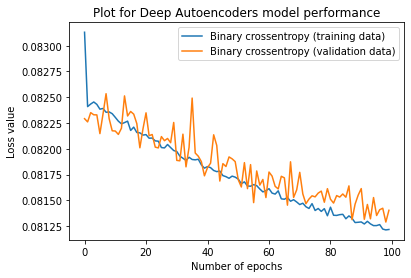

In [ ]:
# Plot history:
plt.plot(history.history['loss'], label='Binary crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Binary crossentropy (validation data)')
plt.title('Plot for Deep Autoencoders model performance')
plt.ylabel('Loss value')
plt.xlabel('Number of epochs')
plt.legend(loc="upper right")
plt.show()

In [ ]:
decoded_imgs=autoencoder.predict(x_test)

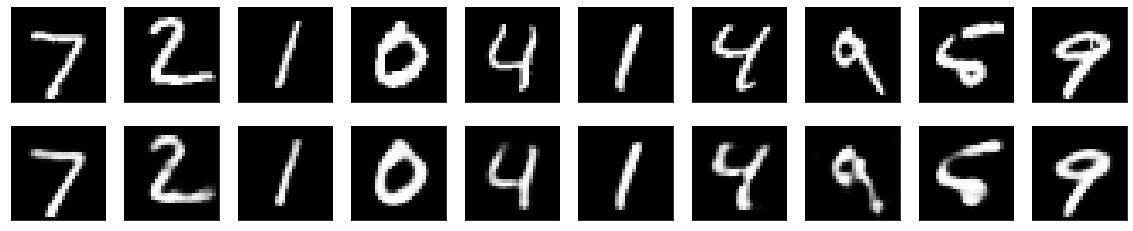

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()